<a href="https://colab.research.google.com/github/TheodoredaCunha/Kdot-Lyrics-TopicModelling/blob/main/TopicModelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Dataset Cleaning and Visualization**

In [76]:
data = pd.read_csv('discog_data.csv')
data.head()

,track_name,album,release_date,duration_ms,popularity,speechiness,danceability,tempo,lyrics
0,Growing Apart,Overly Dedicated,2010-09-14,220995,52,0.3660,0.586,106.835,Where are we going? Why are we slowing down?\n...
1,Ignorance Is Bliss,Overly Dedicated,2010-09-14,210494,55,0.3870,0.644,82.156,Lord forgive me\nKill him where he stand and s...
2,P&P 1.5,Overly Dedicated,2010-09-14,361942,54,0.3690,0.550,146.453,"Oh, what up ho? Oh, what up?\nI said, oh, what..."
3,Alien Girl,Overly Dedicated,2010-09-14,239973,51,0.0367,0.626,95.948,"She look better than Beyoncé, Alicia Keys, Hal..."
4,Opposites Attract,Overly Dedicated,2010-09-14,271909,53,0.4350,0.608,192.157,"Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop..."


In [81]:
stop_words = set(stopwords.words('english'))

with open("profanity-list.txt", "r") as f:
    profanity_words = set(f.read().splitlines())

# Define additional non-specific words (common contractions, modals, fillers)
extra_words = {
    "cant", "wont", "dont", "doesnt", "didnt", "couldnt", "wouldnt", "shouldnt",
    "aint", "im", "youre", "hes", "shes", "its", "were", "theyre", "ive", "youve", "weve", "theyve",
    "id", "youd", "hed", "shed", "wed", "theyd", "isnt", "arent", "wasnt", "werent", "havent", "hasnt", "hadnt",
    "like", "maybe", "might", "must", "shall", "could", "would", "should", "seem", "seems", "seemed", "possibly",
    "probably", "know", "love", "life", "make", "tell", "never", "thats", "real", "back", "want", "said", "gotta",
    "wanna", "need",


    "oh", "huh", "yeah", "ah", "ooh", "uh", "la", "na", "whoa", "hey", "yo", "ho",
    "brrt", "ugh", "hah", "ayy", "yah", "yeah", "bish"
}

# Combine all stopword sets
all_stopwords = stop_words.union(profanity_words, extra_words)

def clean_lyrics(lyrics):
    # Convert to lowercase
    lyrics = lyrics.lower()

    # Replace newlines (\n) with spaces
    lyrics = lyrics.replace("\n", " ")

    # Remove punctuation
    lyrics = ''.join([char for char in lyrics if char not in string.punctuation])

    # Tokenize and remove unwanted words
    cleaned_words = [word for word in lyrics.split() if word not in all_stopwords and len(word) >= 4]

    return cleaned_words  # Returns a list of words

# Apply cleaning function
data['cleaned_lyrics'] = data['lyrics'].apply(clean_lyrics)

# Check output
print(data[['album', 'cleaned_lyrics']].head())

              album                                     cleaned_lyrics
0  Overly Dedicated  [going, slowing, going, growing, smoke, smoke,...
1  Overly Dedicated  [lord, forgive, stand, stand, shake, hand, jum...
2  Overly Dedicated  [well, alright, going, something, patrón, feel...
3  Overly Dedicated  [look, better, beyoncé, alicia, keys, halle, b...
4  Overly Dedicated  [hurt, people, people, hurt, hurt, people, peo...


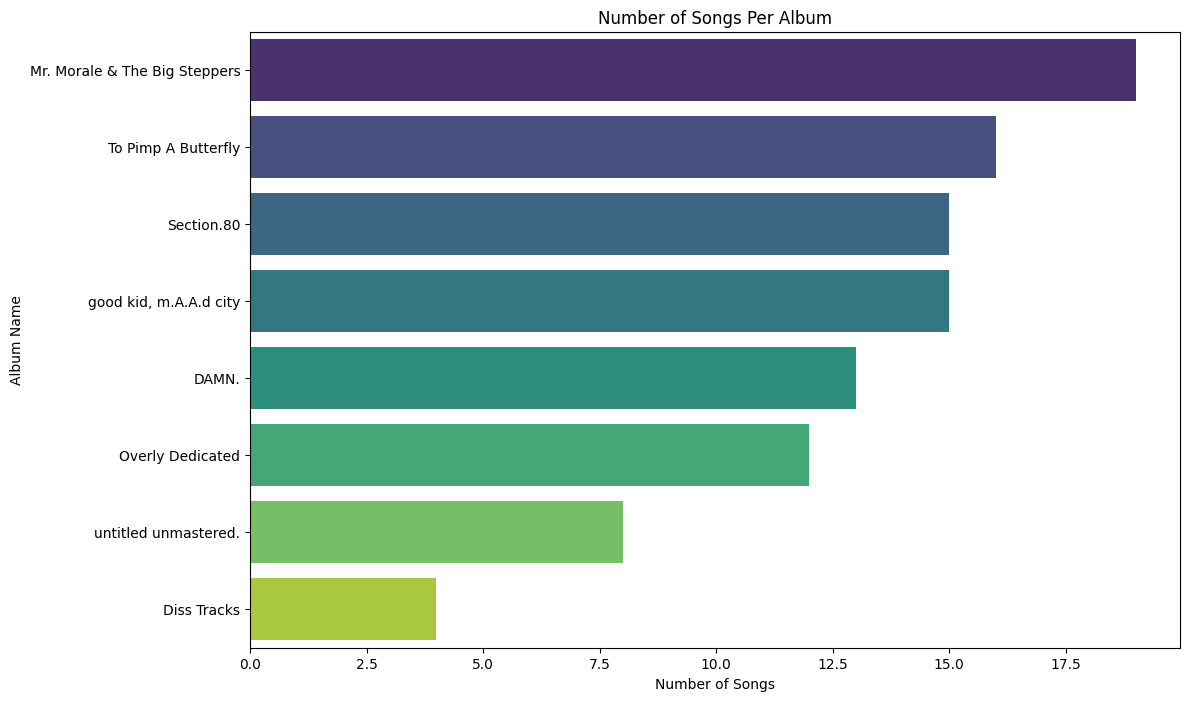

In [77]:
# Album distribution
album_counts = data['album'].value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=album_counts.values, y=album_counts.index, palette="viridis")

plt.xlabel("Number of Songs")
plt.ylabel("Album Name")
plt.title("Number of Songs Per Album")

plt.show()

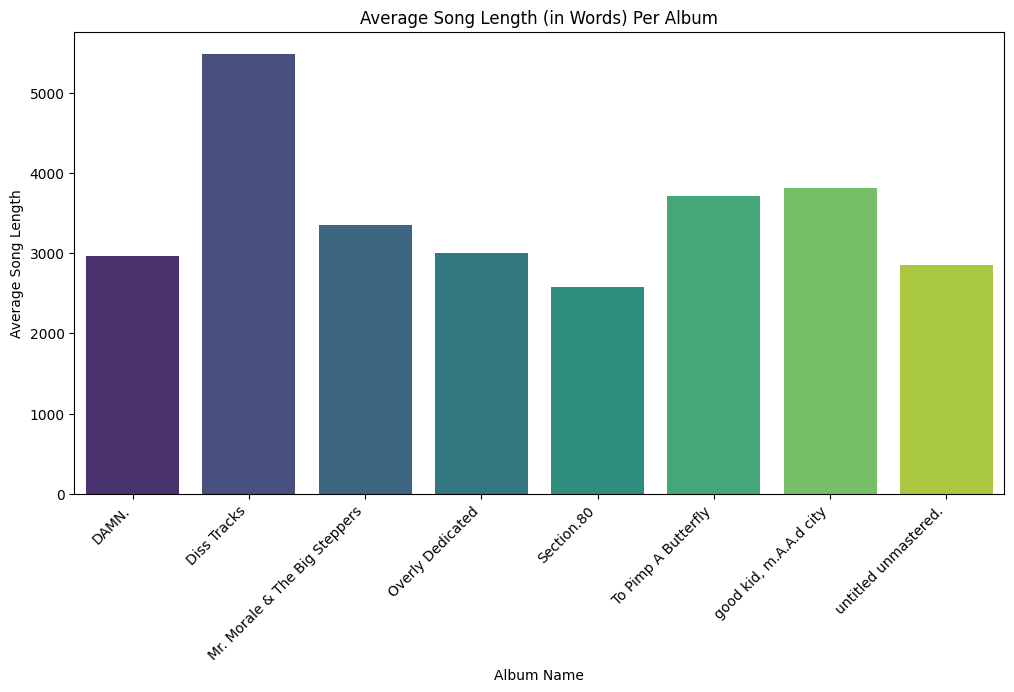

In [78]:
# Calculate average length of songs per album

data['word_count'] = data['cleaned_lyrics'].apply(lambda x: len(x))

# Calculate the average song length per album
album_avg_length = data.groupby('album')['word_count'].mean()

# Round to 2 decimal places for clarity
album_avg_length = album_avg_length.round(2)

# Set up the plot
plt.figure(figsize=(12, 6))  # Set figure size

# Create a bar plot of average word count per album
sns.barplot(x=album_avg_length.index, y=album_avg_length.values, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("Album Name")
plt.ylabel("Average Song Length")
plt.title("Average Song Length (in Words) Per Album")

# Display the plot
plt.show()


# **LDA**



In [79]:
!pip install pyLDAvis

In [80]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [82]:
dictionary = corpora.Dictionary(data["cleaned_lyrics"])
corpus = [dictionary.doc2bow(text) for text in data["cleaned_lyrics"]]


In [83]:
num_topics = 5
# Define number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Print the topics
for i, topic in lda_model.print_topics():
    print(f"Topic {i}: {topic}")

Topic 0: 0.014*"please" + 0.013*"everybody" + 0.008*"even" + 0.006*"smoke" + 0.006*"walls" + 0.005*"time" + 0.005*"complicated" + 0.005*"needs" + 0.005*"loving" + 0.004*"talk"
Topic 1: 0.006*"hurt" + 0.005*"people" + 0.005*"west" + 0.005*"kanye" + 0.004*"time" + 0.004*"kendrick" + 0.004*"pray" + 0.004*"lamar" + 0.003*"bout" + 0.003*"live"
Topic 2: 0.006*"cause" + 0.005*"feel" + 0.005*"world" + 0.005*"made" + 0.004*"funk" + 0.004*"sorry" + 0.004*"time" + 0.004*"right" + 0.004*"live" + 0.004*"also"
Topic 3: 0.011*"take" + 0.010*"come" + 0.006*"high" + 0.006*"baby" + 0.006*"cause" + 0.005*"really" + 0.005*"much" + 0.005*"feel" + 0.005*"time" + 0.004*"look"
Topic 4: 0.009*"good" + 0.006*"loyalty" + 0.005*"live" + 0.005*"vibe" + 0.004*"still" + 0.004*"feel" + 0.004*"inside" + 0.004*"money" + 0.004*"look" + 0.004*"give"


In [84]:
# Assign the dominant topic for each song
def get_topic_distribution(text):
    bow_vector = dictionary.doc2bow(text)
    return lda_model.get_document_topics(bow_vector)

data["topic_distribution"] = data["cleaned_lyrics"].apply(get_topic_distribution)

# Print a sample of the dataset with topics
print(data[["lyrics", "topic_distribution"]].head())

                                              lyrics topic_distribution
0  Where are we going? Why are we slowing down?\n...   [(3, 0.9939487)]
1  Lord forgive me\nKill him where he stand and s...  [(3, 0.99614936)]
2  Oh, what up ho? Oh, what up?\nI said, oh, what...  [(3, 0.99690455)]
3  She look better than Beyoncé, Alicia Keys, Hal...   [(3, 0.9952604)]
4  Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop...   [(1, 0.9940907)]


In [85]:
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [86]:
num_words = 10  # Number of words to display per topic

for topic_id in range(lda_model.num_topics):
    words = lda_model.show_topic(topic_id, num_words)
    top_words = ", ".join([word for word, prob in words])
    print(f"Topic {topic_id}: {top_words}")


Topic 0: please, everybody, even, smoke, walls, time, complicated, needs, loving, talk
Topic 1: hurt, people, west, kanye, time, kendrick, pray, lamar, bout, live
Topic 2: cause, feel, world, made, funk, sorry, time, right, live, also
Topic 3: take, come, high, baby, cause, really, much, feel, time, look
Topic 4: good, loyalty, live, vibe, still, feel, inside, money, look, give


In [87]:
# Assign dominant topic
def get_dominant_topic(text):
    bow_vector = dictionary.doc2bow(text)
    topic_probs = lda_model.get_document_topics(bow_vector)

    if topic_probs:  # Ensure it's not empty
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Get topic with highest probability
        return dominant_topic
    return None  # Handle cases where no topic is found

data = data.drop(columns = ['topic_distribution'])
# Apply the function to get dominant topic
data["dominant_topic"] = data["cleaned_lyrics"].apply(get_dominant_topic)

data.head()


,track_name,album,release_date,duration_ms,popularity,speechiness,danceability,tempo,lyrics,word_count,cleaned_lyrics,dominant_topic
0,Growing Apart,Overly Dedicated,2010-09-14,220995,52,0.3660,0.586,106.835,Where are we going? Why are we slowing down?\n...,1865,"[going, slowing, going, growing, smoke, smoke,...",3
1,Ignorance Is Bliss,Overly Dedicated,2010-09-14,210494,55,0.3870,0.644,82.156,Lord forgive me\nKill him where he stand and s...,3099,"[lord, forgive, stand, stand, shake, hand, jum...",3
2,P&P 1.5,Overly Dedicated,2010-09-14,361942,54,0.3690,0.550,146.453,"Oh, what up ho? Oh, what up?\nI said, oh, what...",4043,"[well, alright, going, something, patrón, feel...",3
3,Alien Girl,Overly Dedicated,2010-09-14,239973,51,0.0367,0.626,95.948,"She look better than Beyoncé, Alicia Keys, Hal...",2404,"[look, better, beyoncé, alicia, keys, halle, b...",3
4,Opposites Attract,Overly Dedicated,2010-09-14,271909,53,0.4350,0.608,192.157,"Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop...",2288,"[hurt, people, people, hurt, hurt, people, peo...",1


In [88]:
# Group songs by dominant topic
topic_groups = data.groupby("dominant_topic")["track_name"].apply(list)

# Print titles of songs for each topic
for topic, songs in topic_groups.items():
    print(f"Topic {topic + 1}:")
    print(", ".join(songs))
    print("\n" + "-"*40 + "\n")  # Separator for readability

Topic 1:
H.O.C, She Needs Me, Ab, Compton, Black Boy Fly, These Walls, u, Alright, HUMBLE., LOVE., Crown, Mr. Morale, The Heart Part 5

----------------------------------------

Topic 2:
Opposites Attract, Barbed Wire, Hol' Up, Chapter Six, Keisha's Song, Backseat Freestyle, Swimming Pools, untitled 01 | 08.19.2014., untitled 03 | 05.28.2013., United In Grief, Count Me Out, euphoria

----------------------------------------

Topic 3:
R.O.T.C, A.D.H.D, Ronald Reagan Era, Kush & Corinthians, Poetic Justice, good kid, m.A.A.d city, The Recipe, Now Or Never, Wesley's Theory, For Free?, King Kunta, You Ain't Gotta Lie, YAH., PRIDE., GOD., DUCKWORTH., Savior, Auntie Diaries, Mother I Sober, Mirror, meet the grahams

----------------------------------------

Topic 4:
Growing Apart, Ignorance Is Bliss, P&P 1.5, Alien Girl, Michael Jordan, Average Joe, Fuck Your Ethnicity, No Make, Tammy's Song, Chapter Ten, Rigamortus, Blow My High, HiiiPower, The Art of Peer Pressure, Sing About Me, I'm Dying

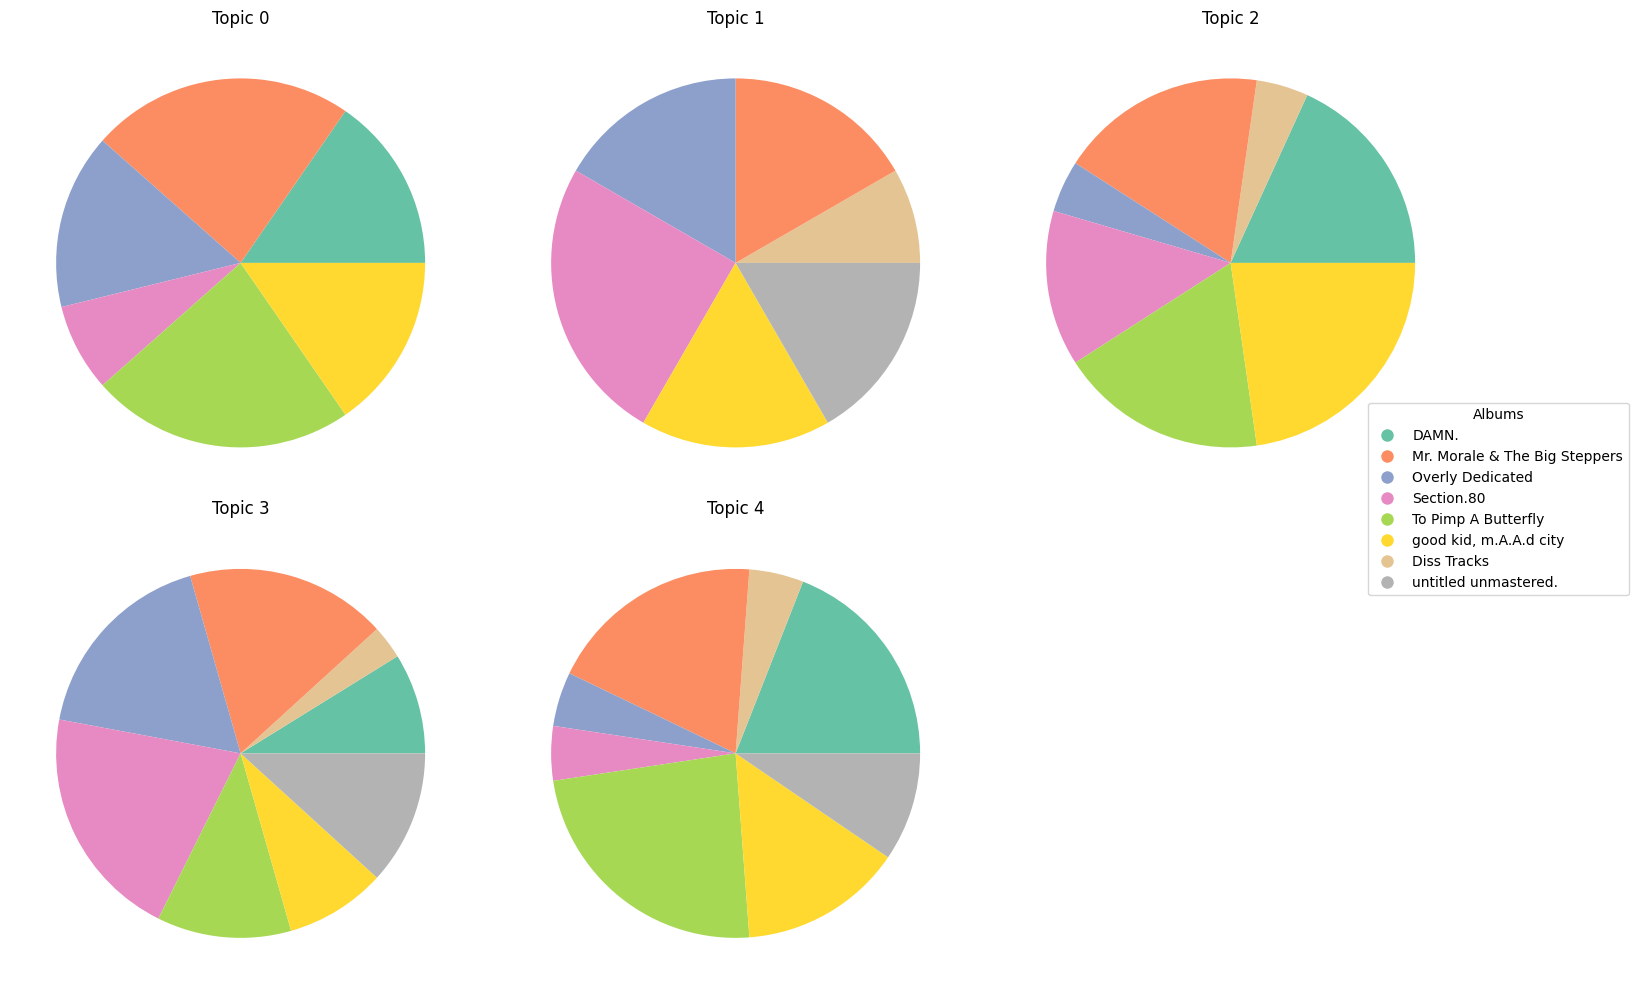

In [89]:
# Count occurrences of each topic within each album
topic_per_album = data.groupby(["dominant_topic", "album"]).size().reset_index(name="count")

# Get unique topics and albums
topics = topic_per_album["dominant_topic"].unique()
albums = topic_per_album["album"].unique()

# Define a color palette (one color per album)
colors = sns.color_palette("Set2", len(albums))
album_color_map = {album: colors[i] for i, album in enumerate(albums)}

# Set up the figure size based on the number of topics
num_topics = len(topics)
cols = 3  # Number of columns in subplot grid
rows = (num_topics // cols) + (num_topics % cols > 0)  # Adjust rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy indexing (works even if there are fewer topics)
axes = axes.flatten()

# Create a pie chart for each topic
for i, topic in enumerate(topics):
    topic_data = topic_per_album[topic_per_album["dominant_topic"] == topic]

    axes[i].pie(
        topic_data["count"],
        labels=None,  # No labels inside the pie chart
        colors=[album_color_map[album] for album in topic_data["album"]]
    )

    axes[i].set_title(f"Topic {topic}")

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a legend outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10,
                       markerfacecolor=album_color_map[album]) for album in albums]
fig.legend(handles, albums, title="Albums", loc="center right", bbox_to_anchor=(1.1, 0.5))

# Adjust layout
plt.tight_layout()
plt.show()
